# Exercise on Gradient Descent and Cost Function

#### Reference Article: https://www.startertutorials.com/blog/gradient-descent-and-cost-function-in-python.html

In [2]:
import numpy as np
import pandas as pd
import math
import sklearn.metrics as skm

In [3]:
df = pd.read_csv("test_scores.csv")
df

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83
5,aamir,49,52
6,venkat,65,66
7,virat,35,30
8,arthur,66,68
9,paul,67,73


### Splitting Dataset into training and testing datasets

In [4]:
from sklearn.model_selection import train_test_split

x = df[['math']]
y = df[['cs']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 101)


print(f'Total # of sample in whole dataset: {len(x)}')
print("*****"*10)
print(f'Total # of sample in train dataset: {len(x_train)}')
print(f'Shape of x_train: {x_train.shape}')
print("*****"*10)
print(f'Total # of sample in test dataset: {len(x_test)}')
print(f'Shape of x_test: {x_test.shape}')

#to convert x_train object that is in the form of df into a numpy array for gradient_descent function to accept
print("*****"*10)
x_train1 = np.array(x_train.math)
print("x_train1 array = ", x_train1)
y_train1 = np.array(y_train.cs)
print("y_train1 array = ", y_train1)

Total # of sample in whole dataset: 10
**************************************************
Total # of sample in train dataset: 6
Shape of x_train: (6, 1)
**************************************************
Total # of sample in test dataset: 4
Shape of x_test: (4, 1)
**************************************************
x_train1 array =  [67 70 49 35 65 56]
y_train1 array =  [73 80 52 30 66 68]


In [17]:
def gradient_descent(x, y,iters,alpha):
    # initial value of m and b
    
    # m is the slope of best fit line, here it is the variable m_curr
    # b is the intercept of best fit line, here it is the variable b_curr
    m_curr = b_curr = 0
    
    # initialize number of steps
    iterations = iters
    
    # Number of data points n
    n = len(x)
    
    # Initialize learning rate
    learning_rate = alpha
    
    cost_previous = 0
    c = []
    for i in range(iterations):
        y_pred = m_curr * x + b_curr   #y=mx+b
        
        # this can be replaced by  a cost fucntion which does the exact same thing
        #cost = skm.mean_squared_error(y, y_pred)
        cost = (1/n) * sum([val**2 for val in (y-y_pred)]) #this is cost fucntion(MSE) but calculated manually
        
        md = -(2/n)*sum(x*(y-y_pred))
        bd = -(2/n)*sum(y-y_pred)
        
        m_curr = m_curr - learning_rate * md
        # print(m_curr)
        b_curr = b_curr - learning_rate * bd
        # print(b_curr)
         
        # if statement for loop to exit when current cost is very close to previous cost
        if math.isclose(cost, cost_previous, rel_tol=0.01):
            break
            
        cost_previous = cost
        c.append(cost)
    print("m = {}, b = {}, cost = {}, i = {}".format(m_curr, b_curr, cost, i))
    return cost,m_curr, b_curr,c,i

#### math.isclose() function used in the above gradient descent fucntion

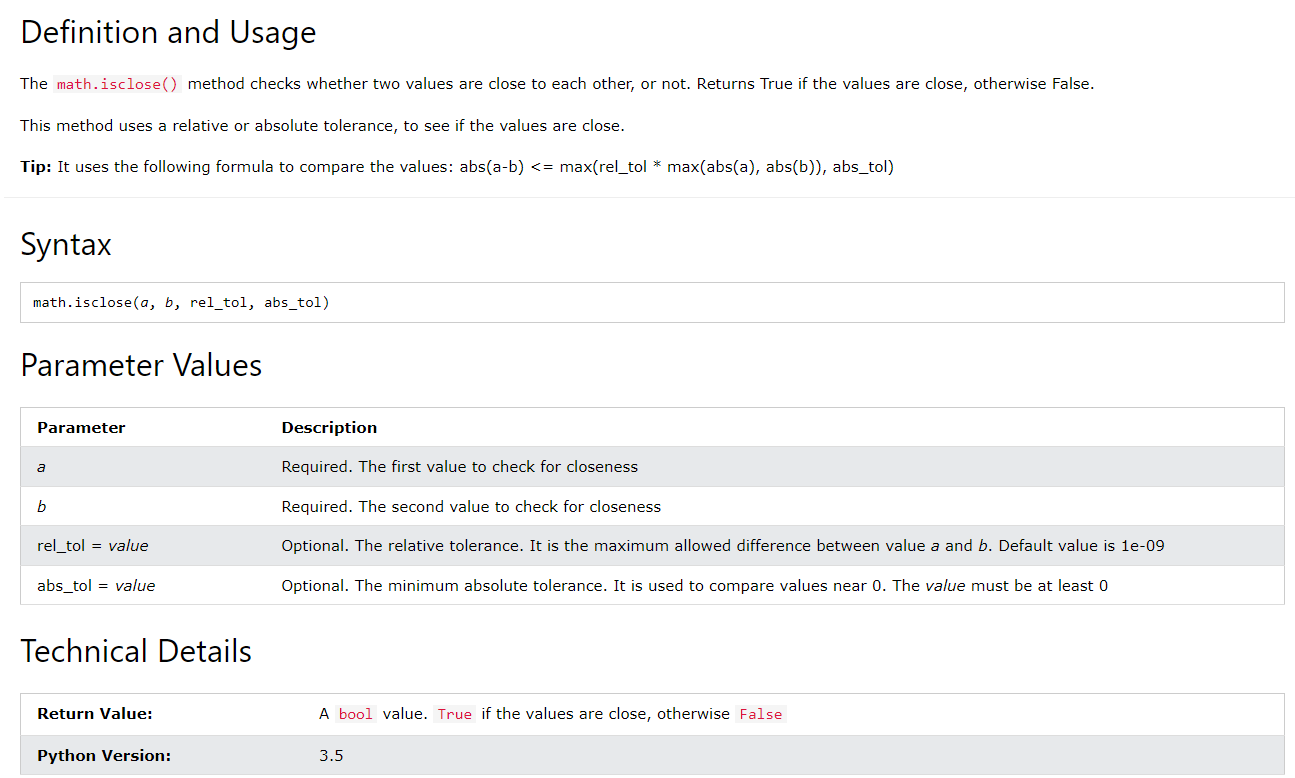

### Fitting Simple Linear Regression to Training set

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [19]:
print("m = ",regressor.coef_)  # m is the slope of best fit line
print("b = ",regressor.intercept_) # b is the intercept of best fit line

m =  [[1.30839002]]
b =  [-13.07823129]


In [23]:
alpha = 0.01
iters = 10
cost,m,b,c,i = gradient_descent(x_train1, y_train1,iters,alpha)

m = -1.9663332834763382e+18, b = -3.3004247757623156e+16, cost = 2.932016593684448e+36, i = 9


In [24]:
y_pred_gd = []
for k in range(len(x_train1)):
    x = x_train1[k]
    y_pred_gd.append(x*m+b)

## Conclusion:
#### As observed the values of m and b i.e slope and intercept obtained from using the Linear regression Model from Sci-kit learn and the gradient_descent fucntion are very close
#### Hence we can conclude that the gradient_descent fucntion gave the correct best-fit line

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

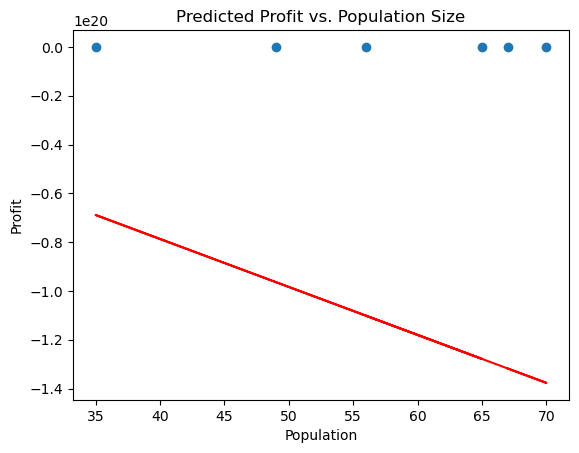

In [27]:
import matplotlib.pyplot as plt
plt.plot(x_train1, y_pred_gd, 'r', label='Prediction')

plt.scatter(x_train1, y_train1, label='Testing Data')
plt.xlabel('Population')  
plt.ylabel('Profit')  
plt.title('Predicted Profit vs. Population Size')